# Posteando desde Jupyter

El siguiente contenido no es mas que para probar a Nikola. ¿Podrá incluir el jupyter notebook dentro de sus posts? 

El procedimiento no fue tan directo, a medida que aparecían errores los iba solucionando, acá los paso en limpio:

- Es necesaria la extensión ``jupyter_contrib_nbextensions``, la instalamos dentro del virtualenv nikola del siguiente modo: ``bin/python -m pip install -U jupyter_contrib_nbextensions``

- Escribirmos nuestro notebook y lo guardamos en ``posts``. 

- La documentación nos dice que debemos agregar ciertos metadatos en el notebook, en jupyter lab no está tan sencillo de hacer, así que final de todo lo agregué desde jupyter notebook (Edit-> Edit Notebook Metadata). 

```
"nikola": {
     "title": "Posteando desde Jupyter",
     "slug": "posteando-desde-jupyter",
     "date": "2020-11-23 13:03:01 UTC-03:00"
}
```

Una vez hecho lo previo ejecutamos: ``$nikola build``

In [2]:
import pandas as pd
import plotly.graph_objects as go

In [3]:
estacion = pd.read_csv("data/cultivos/maiz_p1.csv", sep=";", parse_dates=["datetime"])

In [4]:
estacion.head()

datetime    cmca  d1  d2  d3  d4  d5  d6  d7  d8  ...  d21  d22  \
0 2019-12-24 11:54:19  130.51  25  24  24  25  25  25  25  24  ...   24   23   
1 2019-12-24 11:55:59  129.87  26  26  25  25  25  25  25  26  ...   25   25   
2 2019-12-24 16:16:32  129.38  46  46  46  46  57  47  47  47  ...   47   47   
3 2019-12-24 20:36:18  129.06  48  49  48  48  48  48  48  48  ...   49   49   
4 2019-12-25 00:54:15  127.13  46  46  46  46  46  46  46  46  ...   47   47   

   d23  d24  d25  d26  d27  d28  d29  d30  
0   24   24   23   24   24   24   23   24  
1   25   25   26   29   26   26   25   25  
2   47   47   47   47   47   47   47   47  
3   49   47   45   45   46   49   49   49  
4   47   47   47   47   47   47   47   47  

[5 rows x 32 columns]

In [5]:
brocal = 20
sonda = 600
estacion["nivel_freatico"] = (sonda-estacion["cmca"])/100

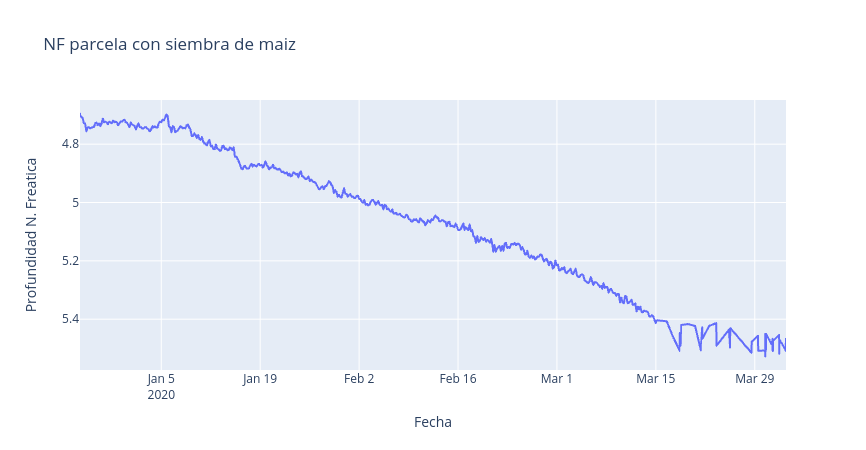

In [6]:
fig = go.Figure()
fig.add_trace(go.Scattergl(x=estacion.datetime, y=estacion.nivel_freatico, mode="lines"))
fig.update_yaxes(autorange="reversed")
fig.update_layout(
    title="NF parcela con siembra de maiz",
    xaxis_title="Fecha",
    yaxis_title="Profundidad N. Freatica",
)

fig.show()

## Equipo 4 - prueba B
- Registra voltaje
- 5 distancias
- temp y humedad (dht22)

In [7]:
eq4pb = pd.read_csv("data/datalogger/EQ4pB.TXT", sep=";", parse_dates=['datetime'], comment='#')
eq4pb.head()

datetime  voltaje  d1  d2  d3  d4  d5  humedad  temperatura
0 2020-10-17 02:40:11     4.07  63   6  28  26   3     57.5         26.7
1 2020-10-17 02:40:17     4.07   4   4  28   4   4     57.4         26.6
2 2020-10-17 02:40:23     4.07   3   3  29  27   3     57.4         26.5
3 2020-10-17 02:40:29     4.07  49   4  28  26   4     57.5         26.5
4 2020-10-17 02:40:48     4.06  52   4  28  26   5     57.7         26.4

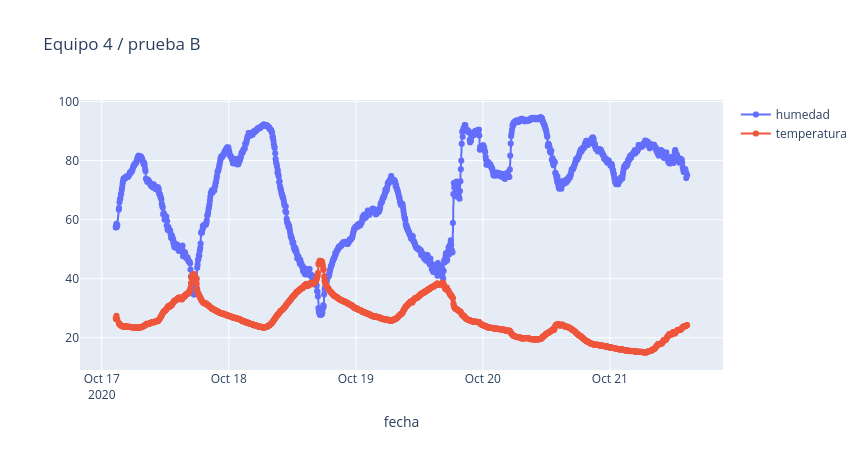

In [8]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=eq4pb.datetime, y=eq4pb.humedad, mode='markers+lines', name="humedad"))
fig.add_trace(go.Scatter(x=eq4pb.datetime, y=eq4pb.temperatura, mode='markers+lines', name="temperatura"))
fig.update_layout(
    title="Equipo 4 / prueba B",
    xaxis_title="fecha",
)
fig.show()